# Load dataset & preprocessing

In [1]:
import pandas as pd
import numpy as np

root_dir = "datasets/infuluenza/"
data_path = root_dir + "Influenza2.csv"
exp_dir = "datasets/infuluenza/vecLSTMx2/"

df = pd.read_csv(data_path)

In [2]:
df_tokyo = df[df['regnames'].isin(["Tokyo"])]

df_tokyo.head()

,Alltime,Time,region,regnames,Longitude,Latitude,Altitude,Year,Month,Week,Flucases,Holiday,Tempave,Tempmin,Tempmax,Rh,Rainfall
12480,12481,1,13,Tokyo,35.689185,139.691648,34.9,2000,1,1,818,2,9.528571,6.371429,13.385714,50.571429,1.0
12481,12482,2,13,Tokyo,35.689185,139.691648,34.9,2000,1,2,1167,3,8.642857,5.457143,12.000000,61.142857,41.5
12482,12483,3,13,Tokyo,35.689185,139.691648,34.9,2000,1,3,2562,2,6.828571,4.171429,9.500000,56.000000,24.0
12483,12484,4,13,Tokyo,35.689185,139.691648,34.9,2000,1,4,3781,2,5.342857,1.542857,9.400000,42.000000,0.0
12484,12485,5,13,Tokyo,35.689185,139.691648,34.9,2000,1,5,3903,2,7.214286,3.171429,11.585714,38.714286,0.0


In [3]:
import matplotlib.pyplot as plt #描画用ライブラリ

In [4]:
train_n = int(len(df_tokyo["Flucases"])*0.75)
test_n = int(len(df_tokyo["Flucases"])*0.25)
train_n, test_n

(780, 260)

In [5]:
train_steps = np.arange(train_n)
test_steps = np.arange(train_n,train_n + test_n)

In [6]:
columns = ["Flucases","Tempave", "Rh", "Holiday", "Rainfall"]

all_data = df_tokyo[columns]

In [7]:
train_df = all_data[columns][0:train_n]
test_df = all_data[columns][train_n:train_n+test_n]

In [8]:
train_df.head()

,Flucases,Tempave,Rh,Holiday,Rainfall
12480,818,9.528571,50.571429,2,1.0
12481,1167,8.642857,61.142857,3,41.5
12482,2562,6.828571,56.000000,2,24.0
12483,3781,5.342857,42.000000,2,0.0
12484,3903,7.214286,38.714286,2,0.0


In [9]:
test_df.head()

,Flucases,Tempave,Rh,Holiday,Rainfall
13260,3809,5.357143,47.142857,3,6.5
13261,9892,6.285714,38.285714,2,35.5
13262,8198,5.628571,53.857143,3,19.0
13263,9625,6.771429,63.714286,2,31.5
13264,7844,4.228571,49.000000,2,9.0


trainとtestのdfを作る

In [10]:
train_ts_df = train_df["Flucases"]
train_ys_df = train_df[["Tempave", "Rh", "Rainfall"]]
train_xs_df = train_df["Holiday"]

test_ts_df = test_df["Flucases"]
test_ys_df = test_df[["Tempave", "Rh", "Rainfall"]]
test_xs_df = test_df["Holiday"]

# Dataset and DataLoader

In [11]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import torch
import torch.nn as nn
from torch.nn import Sequential, Linear, Tanh, Sigmoid, LeakyReLU, ReLU
import torch.nn.functional as F
import torch.optim as optim

import numpy as np #数値計算用ライブラリ
import matplotlib.pyplot as plt #描画用ライブラリ

In [12]:
root_dir = "datasets/infuluenza/"
data_path = root_dir + "Influenza2.csv"
data_dir = "datasets/infuluenza/vecLSTMx2/"
exp_dir = "datasets/infuluenza/vecLSTMx2/"

if not os.path.exists(exp_dir):
    os.makedirs(exp_dir)

In [13]:
seq_length = 13

train_Xs = np.load(data_dir + "train_Xs_" + str(seq_length) + "w.npy")
train_ys = np.load(data_dir + "train_ys_" + str(seq_length) + "w.npy")
val_Xs = np.load(data_dir + "val_Xs_" + str(seq_length) + "w.npy")
val_ys = np.load(data_dir + "val_ys_" + str(seq_length) + "w.npy")

In [14]:
trn_xs_tensor = torch.Tensor(train_Xs)
trn_ys_tensor = torch.Tensor(train_ys)

val_xs_tensor = torch.Tensor(val_Xs)
val_ys_tensor = torch.Tensor(val_ys)

In [15]:
train_Xs.shape, train_ys.shape, val_Xs.shape, val_ys.shape

((613, 13, 5), (613, 1, 5), (154, 13, 5), (154, 1, 5))

In [16]:
import joblib

# スケーラーの読み込み
std_scaler = joblib.load(exp_dir + 'std_scaler.joblib')

In [17]:
from torch.utils.data import TensorDataset, DataLoader

trn_dataset = TensorDataset(trn_xs_tensor, trn_ys_tensor)
trn_loader = DataLoader(dataset=trn_dataset,batch_size=50,shuffle=True)

val_dataset = TensorDataset(val_xs_tensor, val_ys_tensor)
val_loader = DataLoader(dataset=val_dataset,batch_size=50,shuffle=False)

In [18]:
for id, batch_data in enumerate(trn_loader):
    
    batch_x, batch_y = batch_data
    print(id, batch_x.shape, batch_y.shape)

0 torch.Size([50, 13, 5]) torch.Size([50, 1, 5])
1 torch.Size([50, 13, 5]) torch.Size([50, 1, 5])
2 torch.Size([50, 13, 5]) torch.Size([50, 1, 5])
3 torch.Size([50, 13, 5]) torch.Size([50, 1, 5])
4 torch.Size([50, 13, 5]) torch.Size([50, 1, 5])
5 torch.Size([50, 13, 5]) torch.Size([50, 1, 5])
6 torch.Size([50, 13, 5]) torch.Size([50, 1, 5])
7 torch.Size([50, 13, 5]) torch.Size([50, 1, 5])
8 torch.Size([50, 13, 5]) torch.Size([50, 1, 5])
9 torch.Size([50, 13, 5]) torch.Size([50, 1, 5])
10 torch.Size([50, 13, 5]) torch.Size([50, 1, 5])
11 torch.Size([50, 13, 5]) torch.Size([50, 1, 5])
12 torch.Size([13, 13, 5]) torch.Size([13, 1, 5])


In [19]:
for id, batch_data in enumerate(val_loader):
    
    batch_x, batch_y = batch_data
    print(id, batch_x.shape, batch_y.shape)

0 torch.Size([50, 13, 5]) torch.Size([50, 1, 5])
1 torch.Size([50, 13, 5]) torch.Size([50, 1, 5])
2 torch.Size([50, 13, 5]) torch.Size([50, 1, 5])
3 torch.Size([4, 13, 5]) torch.Size([4, 1, 5])


# LSTM model

In [20]:
class cLSTM(nn.Module):
    def __init__(self, input_size = 4, hidden_size=32, cond_size = 1, output_size=4, num_layers = 2):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.cond_size = cond_size
        self.n_layers = num_layers
        
        self.relu = ReLU()
        self.lrelu = LeakyReLU(negative_slope=0.01)
        
        # input_sizeは入力する次元数
        self.lstm = nn.LSTM(input_size=self.input_size, num_layers=self.n_layers, hidden_size=self.hidden_size, dropout=0.2)
        
        self.cfc1 = nn.Linear(self.cond_size, int(self.hidden_size / 2))
        self.cfc2 = nn.Linear(int(self.hidden_size / 2), int(self.hidden_size / 4))
        
        self.fc1 = nn.Linear(int(self.hidden_size / 4) + self.hidden_size, self.hidden_size * 4)
        self.fc2 = nn.Linear(self.hidden_size * 4, self.output_size)


    def forward(self, x, cin):
        last_outs, hidden = self.lstm(x) #(batch_size, seq_len, hidden)
        outs = last_outs[:, -1, :] #(batch_size, hidden)
        
        ch1 = self.relu(self.cfc1(cin))
        ch2 = self.cfc2(ch1)
        
        h_list = [outs, ch2]
        h1 = torch.cat(h_list, dim=1)
        h2 = self.relu(self.fc1(h1))
        h3 = self.fc2(h2)
        
        y_list = [self.relu(h3[:,0:1]), h3[:,1:3], self.relu(h3[:,3:4])]
        ys = torch.cat(y_list, dim=1)

        return ys

In [21]:
model = cLSTM(input_size = 5, hidden_size = 32, cond_size = 1, output_size = 4, num_layers = 1)

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


## Prediction

In [22]:
batch_0x = list(trn_loader)[0][0]
batch_0c = list(trn_loader)[0][1]

In [23]:
batch_0x.shape, batch_0c.shape

(torch.Size([50, 13, 5]), torch.Size([50, 1, 5]))

In [24]:
batch_0c = torch.reshape(batch_0c[:,:,-1], (batch_0c.shape[0], 1))

In [25]:
batch_0c.shape

torch.Size([50, 1])

In [26]:
preds = model(batch_0x, batch_0c)

In [27]:
preds.shape

torch.Size([50, 4])

## Train

In [28]:
model.cuda()

cLSTM(
  (relu): ReLU()
  (lrelu): LeakyReLU(negative_slope=0.01)
  (lstm): LSTM(5, 32, dropout=0.2)
  (cfc1): Linear(in_features=1, out_features=16, bias=True)
  (cfc2): Linear(in_features=16, out_features=8, bias=True)
  (fc1): Linear(in_features=40, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=4, bias=True)
)

In [29]:
criterion = nn.MSELoss(reduction='none').cuda()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [30]:
def val_model(epoch):
    
    model.eval()
    
    sum_errors = 0
    
    for batch_data in val_loader:
       
        with torch.no_grad():
            
            if torch.cuda.is_available():
                inputs, trues = batch_data
                inputs, trues = inputs.cuda(), trues.cuda()
                input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))

            preds = model(inputs, input_c)
            true_ys = torch.reshape(trues[:,:,0:4], (trues.shape[0], 4))
            loss = criterion(preds, true_ys).mean(dim=0).mean()
            
            sum_errors = sum_errors + loss.data.item()

            del loss
            torch.cuda.empty_cache()
            
    return sum_errors / len(val_loader)

In [31]:
train_loss_hist = []
val_loss_hist = []
best_loss = 1e10
n_epochs = 500

for epoch in range(n_epochs):
    
    model.train()
    train_loss = 0
    
    for batch_data in trn_loader:
        
        inputs, trues = batch_data
        inputs, trues = inputs.cuda(), trues.cuda()
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        optimizer.zero_grad()
        
        preds = model(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:4], (trues.shape[0], 4))
        loss = criterion(preds, true_ys).mean(dim=0).mean()
        
        loss.backward() #偏微分を計算
        
        train_loss += loss.item()

        #パラメータを更新する
        optimizer.step()
    
    val_loss = val_model(epoch)
    train_loss_hist.append(train_loss / len(trn_loader))
    val_loss_hist.append(val_loss)
    
    print("epoch: ", epoch, "Train loss: ", train_loss / len(trn_loader), "Val loss: ", val_loss)
    
    if val_loss < best_loss:
        save_model_path = exp_dir + "best_model_" + str(seq_length) + "w.pt"
        torch.save(model, save_model_path)
        best_loss = val_loss

epoch:  0 Train loss:  0.9710091214913589 Val loss:  1.163412645459175
epoch:  1 Train loss:  0.9441759219536414 Val loss:  1.1150247007608414
epoch:  2 Train loss:  0.8370398145455581 Val loss:  1.0080279111862183
epoch:  3 Train loss:  0.6700838758395269 Val loss:  0.8681681230664253
epoch:  4 Train loss:  0.5218088535162119 Val loss:  0.8054785057902336
epoch:  5 Train loss:  0.47988388859308684 Val loss:  0.7976558059453964
epoch:  6 Train loss:  0.4529785903600546 Val loss:  0.8020578026771545
epoch:  7 Train loss:  0.4370790055164924 Val loss:  0.7879719212651253
epoch:  8 Train loss:  0.42262492042321426 Val loss:  0.7851943373680115
epoch:  9 Train loss:  0.40710662878476656 Val loss:  0.7833925560116768
epoch:  10 Train loss:  0.44645792704362136 Val loss:  0.7770633399486542
epoch:  11 Train loss:  0.40701093582006603 Val loss:  0.7745566964149475
epoch:  12 Train loss:  0.4052544958316363 Val loss:  0.7726412117481232
epoch:  13 Train loss:  0.4244833726149339 Val loss:  0.7

epoch:  118 Train loss:  0.27175430953502655 Val loss:  0.5320882610976696
epoch:  119 Train loss:  0.28583405911922455 Val loss:  0.5330369845032692
epoch:  120 Train loss:  0.2715096806104367 Val loss:  0.5327573232352734
epoch:  121 Train loss:  0.2664547241651095 Val loss:  0.5349170528352261
epoch:  122 Train loss:  0.2997799137463936 Val loss:  0.5308768600225449
epoch:  123 Train loss:  0.2760630353138997 Val loss:  0.5350178740918636
epoch:  124 Train loss:  0.27267601169072664 Val loss:  0.527125634253025
epoch:  125 Train loss:  0.26566024926992565 Val loss:  0.5325692407786846
epoch:  126 Train loss:  0.26820460649637073 Val loss:  0.5287112593650818
epoch:  127 Train loss:  0.27245087119249195 Val loss:  0.5304422006011009
epoch:  128 Train loss:  0.2797662134353931 Val loss:  0.5296732522547245
epoch:  129 Train loss:  0.2717781009582373 Val loss:  0.532263420522213
epoch:  130 Train loss:  0.2650115249248651 Val loss:  0.5330885387957096
epoch:  131 Train loss:  0.2679368

epoch:  233 Train loss:  0.25755641093620885 Val loss:  0.5274575613439083
epoch:  234 Train loss:  0.254381904235253 Val loss:  0.5148941874504089
epoch:  235 Train loss:  0.25722650495859295 Val loss:  0.5231836251914501
epoch:  236 Train loss:  0.2733084559440613 Val loss:  0.5256307572126389
epoch:  237 Train loss:  0.25764713379052967 Val loss:  0.5305382199585438
epoch:  238 Train loss:  0.25585801555560184 Val loss:  0.5327873453497887
epoch:  239 Train loss:  0.2583900300356058 Val loss:  0.5315589532256126
epoch:  240 Train loss:  0.2541715388114636 Val loss:  0.5214389078319073
epoch:  241 Train loss:  0.257055856860601 Val loss:  0.5243616253137589
epoch:  242 Train loss:  0.25636865771733797 Val loss:  0.5213009528815746
epoch:  243 Train loss:  0.25141719098274523 Val loss:  0.5196118205785751
epoch:  244 Train loss:  0.24850815993088943 Val loss:  0.5138401798903942
epoch:  245 Train loss:  0.2532163606240199 Val loss:  0.5184467136859894
epoch:  246 Train loss:  0.251523

epoch:  350 Train loss:  0.23961955882035768 Val loss:  0.5475985407829285
epoch:  351 Train loss:  0.24464813562539908 Val loss:  0.5624107830226421
epoch:  352 Train loss:  0.2474603893665167 Val loss:  0.5379995107650757
epoch:  353 Train loss:  0.27609821466299206 Val loss:  0.5613399483263493
epoch:  354 Train loss:  0.24216370513805976 Val loss:  0.5535746030509472
epoch:  355 Train loss:  0.23567501627481902 Val loss:  0.5500849112868309
epoch:  356 Train loss:  0.23853050057704633 Val loss:  0.5600232481956482
epoch:  357 Train loss:  0.23855268152860495 Val loss:  0.547329269349575
epoch:  358 Train loss:  0.24068536093601814 Val loss:  0.5553782768547535
epoch:  359 Train loss:  0.23723444915734804 Val loss:  0.5528107210993767
epoch:  360 Train loss:  0.24044660880015448 Val loss:  0.5427858494222164
epoch:  361 Train loss:  0.23451155194869408 Val loss:  0.5443149581551552
epoch:  362 Train loss:  0.2365268228145746 Val loss:  0.5482400506734848
epoch:  363 Train loss:  0.2

epoch:  462 Train loss:  0.21404334960075524 Val loss:  0.5479237474501133
epoch:  463 Train loss:  0.2156138580579024 Val loss:  0.5529310330748558
epoch:  464 Train loss:  0.22058805020955893 Val loss:  0.5517434179782867
epoch:  465 Train loss:  0.2162927148433832 Val loss:  0.5438615307211876
epoch:  466 Train loss:  0.21979614519155943 Val loss:  0.5437286011874676
epoch:  467 Train loss:  0.2287327922307528 Val loss:  0.5526182577013969
epoch:  468 Train loss:  0.2364953916806441 Val loss:  0.5406637974083424
epoch:  469 Train loss:  0.22014104288357955 Val loss:  0.5375344268977642
epoch:  470 Train loss:  0.22080679925588462 Val loss:  0.5641759857535362
epoch:  471 Train loss:  0.2200117936501136 Val loss:  0.5416819043457508
epoch:  472 Train loss:  0.21729993705566114 Val loss:  0.5470842495560646
epoch:  473 Train loss:  0.2247789307282521 Val loss:  0.5548865757882595
epoch:  474 Train loss:  0.2135090988415938 Val loss:  0.5600298419594765
epoch:  475 Train loss:  0.21230

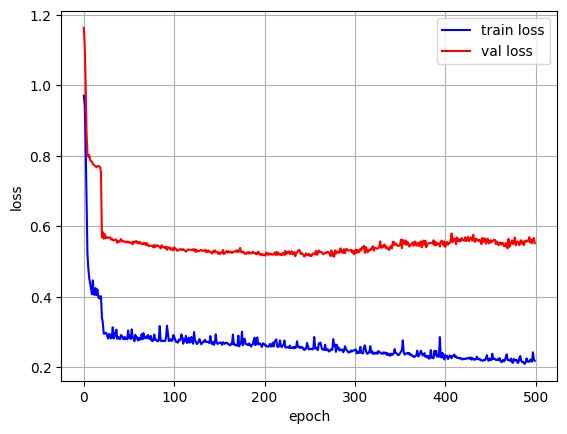

In [32]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss_hist)), train_loss_hist, c='b', label='train loss')
plt.plot(range(len(val_loss_hist)), val_loss_hist, c='r', label='val loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()

In [33]:
np.argmin(val_loss_hist), np.min(val_loss_hist)

(277, 0.5134343281388283)

In [34]:
save_model_path = exp_dir + "best_model_" + str(seq_length) + "w.pt"

model = torch.load(save_model_path)

### Scatter plot

In [35]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(trn_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()
        
        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        trues = torch.reshape(trues, (1, 1, trues.shape[-1]))
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        preds = model(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:4], (trues.shape[0], 4))
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_ys.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [36]:
np.array(trues_list).shape, np.array(preds_list).shape

((613, 1, 4), (613, 1, 4))

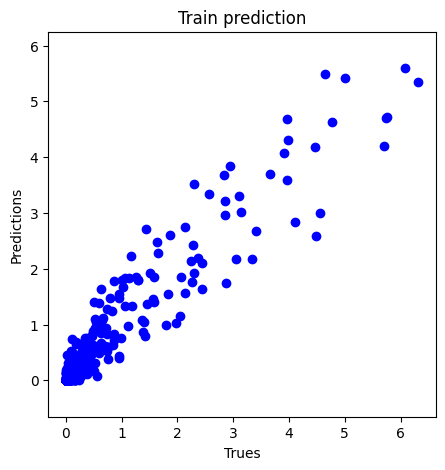

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Train prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.axis("equal")  # X軸とY軸を同じスケールにする
plt.show()

In [38]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(val_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()
        
        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        trues = torch.reshape(trues, (1, 1, trues.shape[-1]))
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        preds = model(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:4], (trues.shape[0], 4))
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_ys.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153


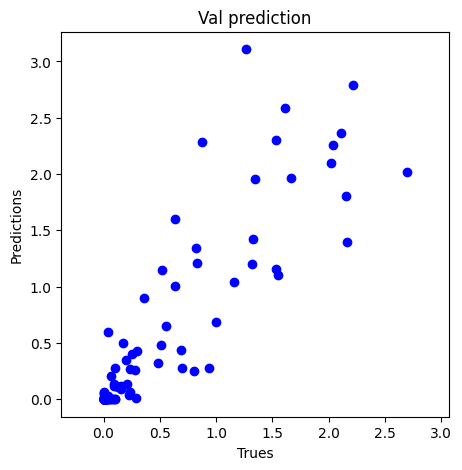

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Val prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.axis("equal")  # X軸とY軸を同じスケールにする

plt.show()

## Test prediction

In [40]:
#test_np = np.concatenate([test_ts_np.reshape(-1,1), test_ys_np, test_xs_np.reshape(-1,1)], axis = 1)

train_np = np.load(exp_dir + "train_np.npy")
test_np = np.load(exp_dir + "test_np.npy")

In [41]:
train_np.shape, test_np.shape

((780, 5), (260, 5))

In [42]:
import joblib

# スケーラーの読み込み
std_scaler = joblib.load(data_dir + 'std_scaler.joblib')

In [43]:
#元のデータの最大値と最小値を指定
dat_min = 0
dat_max = 3e5

#スケール後の最大値と最小値を指定
custom_min = 0
custom_max = 100

In [44]:
test_scaled_ts = (np.array(test_np[:,0]) - dat_min) / (dat_max - dat_min) * (custom_max - custom_min) + custom_min

In [45]:
#元のデータの最大値と最小値を指定
dat_min = 0
dat_max = 500

#スケール後の最大値と最小値を指定
custom_min = 0
custom_max = 10

test_scaled_zs = (np.array(test_np[:,3]) - dat_min) / (dat_max - dat_min) * (custom_max - custom_min) + custom_min

In [46]:
test_scaled_ys = std_scaler.transform(test_np[:,1:3])

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [47]:
test_scaled_ys.shape, test_scaled_zs.reshape(-1,1).shape, test_scaled_ts.reshape(-1,1).shape, test_np.shape

((260, 2), (260, 1), (260, 1), (260, 5))

In [48]:
test_all_np = np.concatenate([test_scaled_ts.reshape(-1,1), test_scaled_ys, test_scaled_zs.reshape(-1,1), test_np[:,-1].reshape(-1,1)], axis = 1)

In [49]:
test_all_np.shape

(260, 5)

### 1. Prediction based on results from 40 days ago

In [50]:
from typing import Tuple

def make_sequence_data(data: np.ndarray, seq_size: int) -> Tuple[np.ndarray, np.ndarray]:
    
    """データをsequence_sizeに指定したサイズのシーケンスに分けてシーケンスとその答えをarrayで返す
    Args:
        data (np.ndarray): 入力データ
        seq_size (int): シーケンスサイズ
    Returns:
        seq_arr: seq_sizeに指定した数のシーケンスを格納するarray
        target_arr: シーケンスに対応する答えを格納するarray
    """

    num_data = len(data)
    seq_data = []
    target_data = []
    
    for i in range(num_data - seq_size):
        seq_data.append(data[i:i+seq_size])
        target_data.append(data[i+seq_size:i+seq_size+1])
        
    seq_arr = np.array(seq_data)
    target_arr = np.array(target_data)

    return seq_arr, target_arr

In [51]:
test_Xs, test_ys = make_sequence_data(test_all_np, seq_length)

In [52]:
tst_xs_tensor = torch.Tensor(test_Xs)
tst_ys_tensor = torch.Tensor(test_ys)

In [53]:
from torch.utils.data import TensorDataset, DataLoader

tst_dataset = TensorDataset(tst_xs_tensor, tst_ys_tensor)

In [54]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(tst_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()
        
        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        trues = torch.reshape(trues, (1, 1, trues.shape[-1]))
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        preds = model(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:4], (trues.shape[0], 4))
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_ys.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246


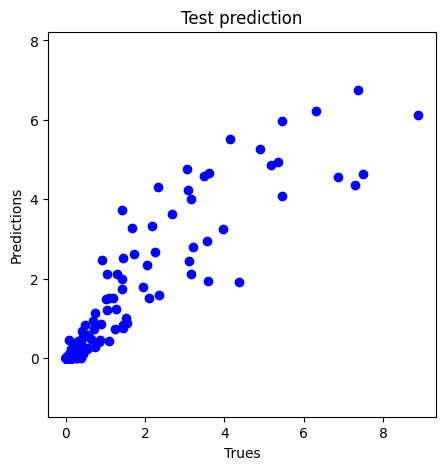

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Test prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画
plt.gca().set_aspect('equal', adjustable='datalim')

plt.show()

In [56]:
tst_trues, tst_preds = np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0]

In [57]:
#元のデータの最大値と最小値を指定
dat_min = 0
dat_max = 3e5

#スケール後の最大値と最小値を指定
custom_min = 0
custom_max = 100

tst_preds = (np.array(preds_list)[:,:,0] - custom_min) / (custom_max - custom_min) * (dat_max - dat_min) + dat_min

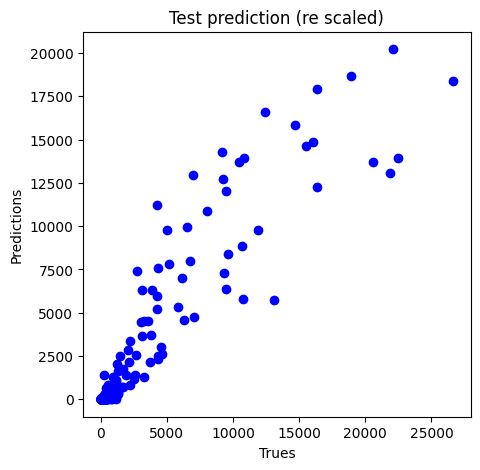

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(test_np[seq_length:,0], tst_preds, c = "b") # 散布図を描画
plt.title("Test prediction (re scaled)")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.show()

In [59]:
tst_preds.shape

(247, 1)

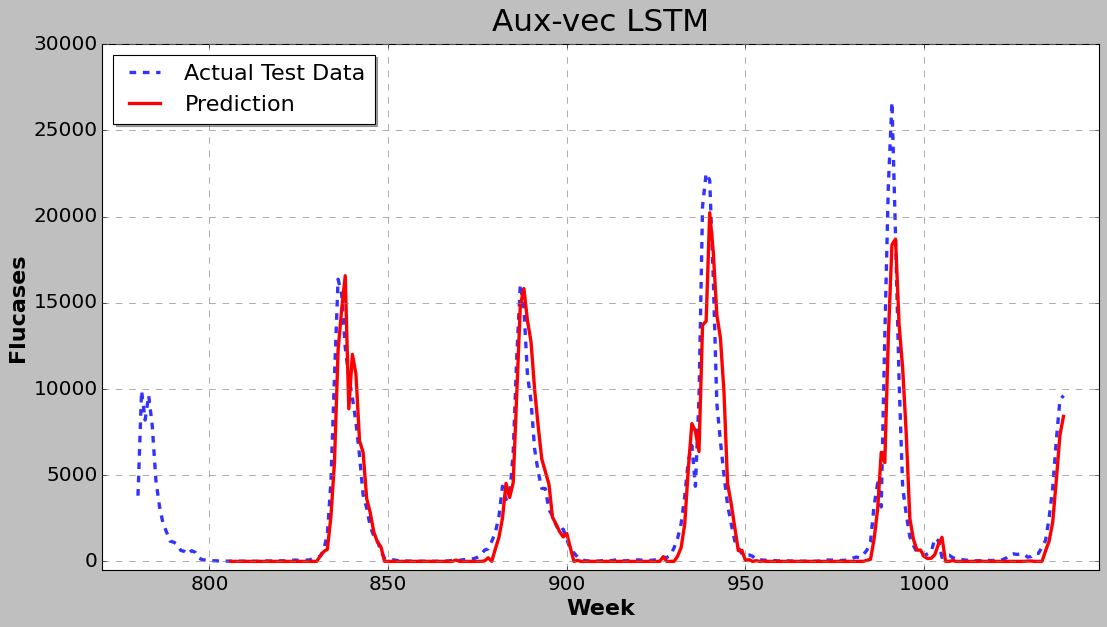

In [64]:
plt.figure(figsize=(14, 8))
plt.style.use('classic')  # スタイリッシュな背景に変更

# 実際のデータと予測データをプロット
plt.plot(test_steps, df_tokyo["Flucases"][train_n:train_n+test_n], label="Actual Test Data", linestyle='--', linewidth=3, color='blue', alpha=0.8)
plt.plot(test_steps[seq_length*2:], tst_preds[seq_length*1:,0], label="Prediction", linestyle='-', linewidth=3, color='red', alpha=1.0)

# 軸ラベルとタイトルを追加
plt.xlabel("Week", fontsize=20, fontweight='bold')
plt.ylabel("Flucases", fontsize=20, fontweight='bold')

plt.title("Aux-vec LSTM", fontsize=28, pad=12)

# グリッドの調整
plt.grid(color='gray', linestyle='--', linewidth=0.75, alpha=0.75)

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# 凡例の調整
plt.legend(fontsize=20, loc='upper left', frameon=True, shadow=True)
plt.ylim(bottom=-500)
plt.xlim(left=min(test_steps) - 10, right = max(test_steps) + 10)

# 仕上げ
plt.tight_layout()
plt.savefig("Aux-vec_LSTM.jpg", dpi=200, bbox_inches='tight', format='jpg')
plt.show()

In [61]:
from sklearn.metrics import (
    mean_squared_error,  # MSE
    mean_absolute_error,  # MAE
    r2_score, # R2
)

from scipy.stats import pearsonr

def reg_metric(trues, preds, name):
    mse = mean_squared_error(trues, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(trues, preds)
    r2 = r2_score(trues, preds)
    r, p = pearsonr(trues, preds)
    
    print(name)
    print(f'MSE : {mse}.')
    print(f'RMSE : {rmse}.')
    print(f'MAE : {mae}.')
    print(f'R2 : {r2}.')
    print("pearson :", r, p)

In [62]:
reg_metric(test_np[seq_length:,0], tst_preds[:,0], "Flucases")

Flucases
MSE : 2926621.1602419647.
RMSE : 1710.7370225262457.
MAE : 772.4480305953547.
R2 : 0.8615476792240702.
pearson : 0.9286143719427609 1.7728854789166308e-107


In [63]:
reg_metric(test_np[seq_length*4:,0], tst_preds[seq_length*3:,0], "Flucases")

Flucases
MSE : 3472671.2695979816.
RMSE : 1863.5104694092763.
MAE : 904.3254078259835.
R2 : 0.8559851446194273.
pearson : 0.925643707152726 6.834939873086512e-89
